In [1]:
import numpy as np

In [2]:
def atom_list(rfeat):
    atoms = {0: None, 1: 'H', 12: 'C', 14: 'N', 16: 'O'}
    al = []
    for i in range(len(rfeat)):
        am = round(rfeat[i, -1]*100)
        al.append(atoms[am])
    return al

In [3]:
from networkx.classes.function import nodes
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix, mylabels):
    np.random.seed(42)
    rows, cols = np.where(adjacency_matrix == 1)
    # label = Labels(mol)
    edges = [(mylabels[i] + ':' + str(i), mylabels[j] + ':' + str(j)) for i, j in zip(rows.tolist(), cols.tolist())]
    # print(edges)
    gr = nx.Graph()
    gr.add_edges_from(edges)
    val_map = {'H': "brown",
            'C': "gray",
           'N': "blue",
           'O': "red",
           'F': "cyan",
           "Cl": "green",
           'Br': "darkred",
           'I': "purple"}
    color_map = {}
    for keys, value in val_map.items():
        for i in range(len(mylabels)):
            key = str(keys) + ':' + str(i)
            color_map[key] = value
    values = [color_map.get(node) for node in gr.nodes()]
    print(values)
    print(gr.nodes())
    nx.draw(gr, node_size=500, node_color=values, labels=None, with_labels=True, font_color='white')
    plt.show()

#show_graph_with_labels(Adjacency(mol), None)

In [4]:
idx = 7

In [5]:
adj_r_ = np.load(open("./cv1/adj_r/adj_r_0.npy",'rb'))[idx, 0]
adj_p_ = np.load(open("./cv1/adj_p/adj_p_0.npy",'rb'))[idx, 0]
p_hard = np.load(open("./cv1/p_hard/p_hard_0.npy",'rb'))[idx, 0]
perm = np.load(open("./cv1/perm/perm_0.npy",'rb'))[idx, 0]
rfeat = np.load(open("./cv1/rfeat/rfeat_0.npy",'rb'))[idx, 0]
pfeat = np.load(open("./cv1/pfeat/pfeat_0.npy",'rb'))[idx, 0]

In [6]:
ratoms = atom_list(rfeat)
ratoms_ref = [i for i in ratoms if i != None]

patoms = atom_list(perm@pfeat)
patoms_ref = [i for i in patoms if i != None]

In [7]:
n_r = len(ratoms_ref)
n_p = len(patoms_ref)
assert n_r == n_p

In [8]:
adj_r = adj_r_[:n_r, :n_r]
adj_p = (p_hard@adj_p_@p_hard.T)[:n_p, :n_p]
true_adj_p = (perm@adj_p_@perm.T)[:n_p, :n_p]

In [9]:
adj_ts = np.maximum(adj_r, adj_p)

In [10]:
adj_r

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
adj_p

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
adj_ts

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

['blue', 'gray', 'brown', 'brown', 'red', 'gray', 'red', 'brown', 'brown', 'gray', 'red', 'brown']
['N:0', 'C:1', 'H:10', 'H:11', 'O:2', 'C:3', 'O:4', 'H:8', 'H:9', 'C:5', 'O:6', 'H:7']


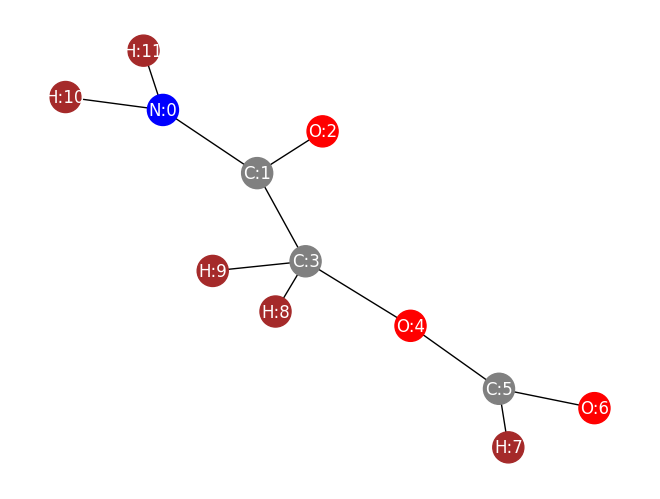

In [13]:
# Reactant
show_graph_with_labels(adj_r, ratoms_ref)

['blue', 'gray', 'brown', 'brown', 'red', 'gray', 'red', 'brown', 'brown', 'gray', 'red', 'brown']
['N:0', 'C:1', 'H:10', 'H:11', 'O:2', 'C:3', 'O:4', 'H:8', 'H:9', 'C:5', 'O:6', 'H:7']


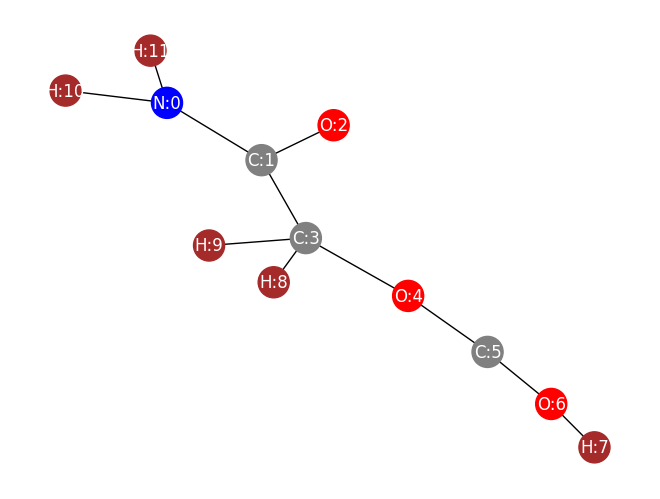

In [14]:
# Product
show_graph_with_labels(true_adj_p, patoms_ref)

['blue', 'gray', 'brown', 'brown', 'red', 'gray', 'red', 'brown', 'brown', 'gray', 'red', 'brown']
['N:0', 'C:1', 'H:10', 'H:11', 'O:2', 'C:3', 'O:4', 'H:8', 'H:9', 'C:5', 'O:6', 'H:7']


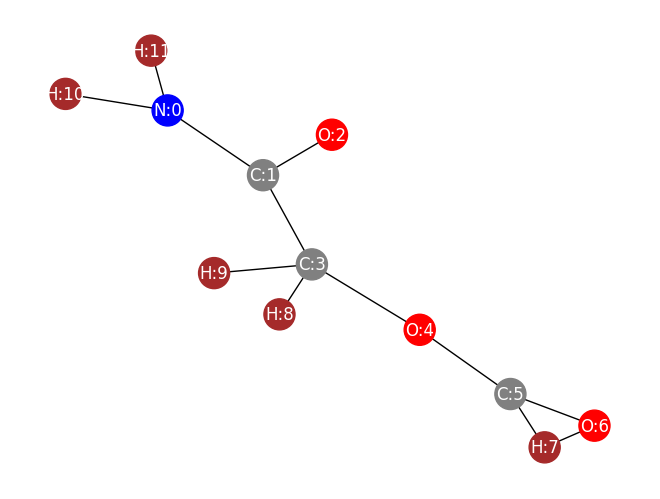

In [15]:
# TS
show_graph_with_labels(adj_ts, ratoms_ref)

['blue', 'gray', 'brown', 'brown', 'red', 'gray', 'red', 'brown', 'brown', 'gray', 'red', 'brown']
['N:0', 'C:1', 'H:10', 'H:11', 'O:2', 'C:3', 'O:4', 'H:8', 'H:9', 'C:5', 'O:6', 'H:7']


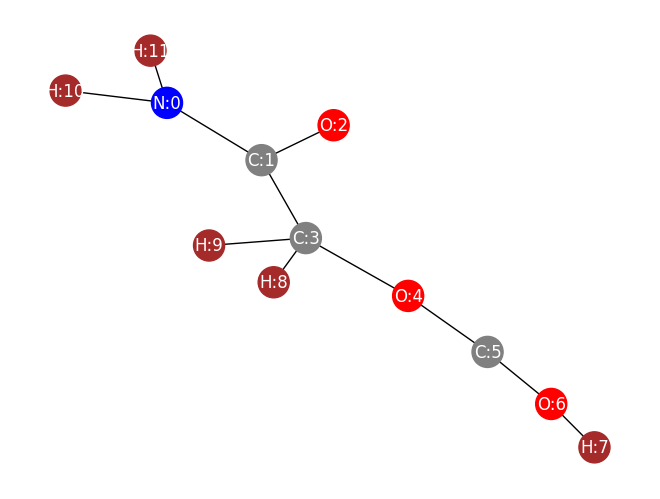

In [16]:
# atom mapped product
show_graph_with_labels(adj_p, patoms_ref)